In [1]:
# %matplotlib inline
from missingpy import MissForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
dataframe = pd.read_excel('patient_info_notCT_comorbidityOut.xlsx', sep=';', index_col=0,decimal='.')
oldDf=pd.read_excel('patient_info_notCT_comorbidityOut.xlsx', sep=';', index_col=0,decimal='.')
dataframe.head(10)

,Label1-Mortality outcome,Label2-SARS-CoV-2 nucleic acids,Age,Body temperature,Gender,Dementia,Brain surgery,Brain stem hemorrhage,Cerebral atherosclerosis,Cerebral hemorrhage,...,Na Value,Na Value in range,PHOS Value,PHOS Value in range,TBIL Value,TBIL Value in range,TP Value,TP Value in range,URIC Value,URIC Value in range
0,Cured,Positive,81,36.6,Male,0,0,0,0,0,...,0.566667,0.0,0.015152,0.0,0.338129,0.0,-0.015789,-1.0,0.299091,0.0
1,Cured,Positive,50,38.7,Male,0,0,0,0,0,...,0.244444,0.0,0.545455,0.0,0.316547,0.0,0.147368,0.0,0.610455,0.0
2,Cured,Positive,65,38.5,Female,0,0,0,0,0,...,0.622222,0.0,0.090909,0.0,-0.028777,-1.0,-0.100000,-1.0,0.402727,0.0
3,Cured,Positive,73,38.5,Male,0,0,0,0,0,...,0.133333,0.0,-0.348485,-1.0,0.323741,0.0,-0.310526,-1.0,0.155909,0.0
4,Cured,Positive,64,38.0,Female,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Cured,Positive,61,37.6,Female,0,0,0,0,0,...,0.277778,0.0,-0.090909,-1.0,0.402878,0.0,0.278947,0.0,0.280909,0.0
6,Unknown,Positive,23,38.7,Female,0,0,0,0,0,...,-0.255556,-1.0,0.969697,0.0,0.625899,0.0,-0.878947,-1.0,0.647727,0.0
7,Cured,Positive,41,36.5,Female,0,0,0,0,0,...,0.500000,0.0,-0.090909,-1.0,0.151079,0.0,0.057895,0.0,-0.167727,-1.0
8,Cured,Positive,25,39.1,Female,0,0,0,0,0,...,0.600000,0.0,0.424242,0.0,0.035971,0.0,-0.594737,-1.0,-0.230455,-1.0
9,Cured,Positive,53,36.2,Female,0,0,0,0,0,...,0.477778,0.0,0.621212,0.0,0.309353,0.0,0.221053,0.0,0.386364,0.0


In [2]:
original_order=dataframe.columns
original_order

Index(['Label1-Mortality outcome', 'Label2-SARS-CoV-2 nucleic acids', 'Age',
       'Body temperature', 'Gender', 'Dementia', 'Brain surgery',
       'Brain stem hemorrhage', 'Cerebral atherosclerosis',
       'Cerebral hemorrhage',
       ...
       'Na Value', 'Na Value in range', 'PHOS Value', 'PHOS Value in range',
       'TBIL Value', 'TBIL Value in range', 'TP Value', 'TP Value in range',
       'URIC Value', 'URIC Value in range'],
      dtype='object', length=251)

In [3]:
label_1=dataframe['Label1-Mortality outcome'].map({'Cured': 0, 'Unknown': -1,'Deceased':1})
label_2=dataframe['Label2-SARS-CoV-2 nucleic acids'].map({'Positive': 1, 'Negative': 0})
label_1

0       0
1       0
2       0
3       0
4       0
       ..
1516   -1
1517   -1
1518    0
1519    0
1520    0
Name: Label1-Mortality outcome, Length: 1521, dtype: int64

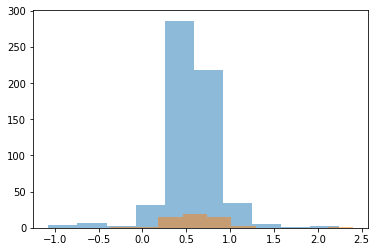

In [4]:
a=plt.figure()
dataframe[label_1==1].iloc[:,173]
a=plt.hist(dataframe[label_1==0].iloc[:,173],alpha=0.5)#173 esima colonna degli 0 (blu)
a=plt.hist(dataframe[label_1==1].iloc[:,173],alpha=0.5)#173 esima colonna degli 1 (arancio)


In [5]:
x=dataframe.isnull().sum()
#plot(x) plottare x dopo averle ordinate in ordine crescente dimissing values

In [6]:
x

Label1-Mortality outcome             0
Label2-SARS-CoV-2 nucleic acids      0
Age                                  0
Body temperature                   152
Gender                               0
                                  ... 
TBIL Value in range                572
TP Value                           571
TP Value in range                  571
URIC Value                         570
URIC Value in range                570
Length: 251, dtype: int64

In [7]:
#togliere label da dataframe
dataframe=dataframe.drop(['Label1-Mortality outcome','Label2-SARS-CoV-2 nucleic acids'],axis=1)
#dataframe

In [8]:
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})

In [9]:
dataframe

,Age,Body temperature,Gender,Dementia,Brain surgery,Brain stem hemorrhage,Cerebral atherosclerosis,Cerebral hemorrhage,Cerebral infarction,Intracranial aneurysm,...,Na Value,Na Value in range,PHOS Value,PHOS Value in range,TBIL Value,TBIL Value in range,TP Value,TP Value in range,URIC Value,URIC Value in range
0,81,36.6,1,0,0,0,0,0,0,0,...,0.566667,0.0,0.015152,0.0,0.338129,0.0,-0.015789,-1.0,0.299091,0.0
1,50,38.7,1,0,0,0,0,0,0,0,...,0.244444,0.0,0.545455,0.0,0.316547,0.0,0.147368,0.0,0.610455,0.0
2,65,38.5,0,0,0,0,0,0,0,0,...,0.622222,0.0,0.090909,0.0,-0.028777,-1.0,-0.100000,-1.0,0.402727,0.0
3,73,38.5,1,0,0,0,0,0,0,0,...,0.133333,0.0,-0.348485,-1.0,0.323741,0.0,-0.310526,-1.0,0.155909,0.0
4,64,38.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,45,38.9,0,0,0,0,0,0,0,0,...,0.333333,0.0,0.227273,0.0,0.251799,0.0,0.121053,0.0,-0.049545,-1.0
1517,66,36.6,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,71,36.6,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,66,36.6,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataframe.columns

Index(['Age', 'Body temperature', 'Gender', 'Dementia', 'Brain surgery',
       'Brain stem hemorrhage', 'Cerebral atherosclerosis',
       'Cerebral hemorrhage', 'Cerebral infarction', 'Intracranial aneurysm',
       ...
       'Na Value', 'Na Value in range', 'PHOS Value', 'PHOS Value in range',
       'TBIL Value', 'TBIL Value in range', 'TP Value', 'TP Value in range',
       'URIC Value', 'URIC Value in range'],
      dtype='object', length=249)

In [11]:
dataframe.columns.tolist().index('Syncope')

170

In [12]:
x1=np.arange(2,dataframe.columns.tolist().index('Syncope')+1)
x2=np.arange(dataframe.columns.tolist().index('Syncope')+2,dataframe.shape[1],2)
cat_cols=np.concatenate((x1,x2))
cat_cols

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 19

In [13]:
Between=[]
imputer = MissForest(decreasing=False)
for i in np.arange(1,100) :
    X_imputed = imputer.fit_transform(dataframe,cat_vars=cat_cols)
    if i==1 :
        imputed_values=X_imputed[np.where(dataframe.isnull())]
        #VarS.append(np.var(imputed_values,axis=0))
        #mean_tot_prec=np.mean(imputed_values)
        #tot+=imputed_values
    else :
        imputed_values=np.vstack((imputed_values,X_imputed[np.where(dataframe.isnull())]))
        #mean_actual_group=np.mean(imputed_values)
        #result=(mean_actual_group-mean_tot_prec)**2
        Variances_iter_i=np.var(imputed_values,axis=0)
        Between.append(np.mean(Variances_iter_i))#between inputation variance fino a quella iterazione
        

#normalizzazione prim di dev.standard
###########################
x=np.std(imputed_values,axis=0)
result=np.mean(x)
#fare in ordine crescente e dec, scegiere media di dev inferiore

newDf = pd.DataFrame(data=X_imputed, columns=dataframe.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [14]:
newDf

,Age,Body temperature,Gender,Dementia,Brain surgery,Brain stem hemorrhage,Cerebral atherosclerosis,Cerebral hemorrhage,Cerebral infarction,Intracranial aneurysm,...,Na Value,Na Value in range,PHOS Value,PHOS Value in range,TBIL Value,TBIL Value in range,TP Value,TP Value in range,URIC Value,URIC Value in range
0,81.0,36.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.566667,0.0,0.015152,0.0,0.338129,0.0,-0.015789,-1.0,0.299091,0.0
1,50.0,38.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.244444,0.0,0.545455,0.0,0.316547,0.0,0.147368,0.0,0.610455,0.0
2,65.0,38.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.622222,0.0,0.090909,0.0,-0.028777,-1.0,-0.100000,-1.0,0.402727,0.0
3,73.0,38.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133333,0.0,-0.348485,-1.0,0.323741,0.0,-0.310526,-1.0,0.155909,0.0
4,64.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.409378,0.0,0.253636,0.0,0.437069,0.0,-0.119822,-1.0,0.286452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,45.0,38.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.227273,0.0,0.251799,0.0,0.121053,0.0,-0.049545,-1.0
1517,66.0,36.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.512767,0.0,0.211515,0.0,0.390878,0.0,-0.223417,-1.0,0.412141,0.0
1518,71.0,36.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.479467,0.0,0.254848,0.0,0.377996,0.0,-0.208303,-1.0,0.253046,0.0
1519,66.0,36.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277889,0.0,0.249848,0.0,0.341028,0.0,-0.114655,-1.0,0.206992,0.0


In [15]:
newDf['Label1-Mortality outcome']=label_1
newDf['Label2-SARS-CoV-2 nucleic acids']=label_2
newDf['Label1-Mortality outcome']=newDf['Label1-Mortality outcome'].map({ 0:'Cured', -1:'Unknown',1:'Deceased'})
newDf['Label2-SARS-CoV-2 nucleic acids']=newDf['Label2-SARS-CoV-2 nucleic acids'].map({1:'Positive',0:'Negative'})
newDf['Gender']=newDf['Gender'].map({1:'Male',0:'Female'})

In [16]:
newDf=newDf.reindex(columns=original_order)

In [17]:
newDf.head(10)

,Label1-Mortality outcome,Label2-SARS-CoV-2 nucleic acids,Age,Body temperature,Gender,Dementia,Brain surgery,Brain stem hemorrhage,Cerebral atherosclerosis,Cerebral hemorrhage,...,Na Value,Na Value in range,PHOS Value,PHOS Value in range,TBIL Value,TBIL Value in range,TP Value,TP Value in range,URIC Value,URIC Value in range
0,Cured,Positive,81.0,36.6,Male,0.0,0.0,0.0,0.0,0.0,...,0.566667,0.0,0.015152,0.0,0.338129,0.0,-0.015789,-1.0,0.299091,0.0
1,Cured,Positive,50.0,38.7,Male,0.0,0.0,0.0,0.0,0.0,...,0.244444,0.0,0.545455,0.0,0.316547,0.0,0.147368,0.0,0.610455,0.0
2,Cured,Positive,65.0,38.5,Female,0.0,0.0,0.0,0.0,0.0,...,0.622222,0.0,0.090909,0.0,-0.028777,-1.0,-0.100000,-1.0,0.402727,0.0
3,Cured,Positive,73.0,38.5,Male,0.0,0.0,0.0,0.0,0.0,...,0.133333,0.0,-0.348485,-1.0,0.323741,0.0,-0.310526,-1.0,0.155909,0.0
4,Cured,Positive,64.0,38.0,Female,0.0,0.0,0.0,0.0,0.0,...,0.409378,0.0,0.253636,0.0,0.437069,0.0,-0.119822,-1.0,0.286452,0.0
5,Cured,Positive,61.0,37.6,Female,0.0,0.0,0.0,0.0,0.0,...,0.277778,0.0,-0.090909,-1.0,0.402878,0.0,0.278947,0.0,0.280909,0.0
6,Unknown,Positive,23.0,38.7,Female,0.0,0.0,0.0,0.0,0.0,...,-0.255556,-1.0,0.969697,0.0,0.625899,0.0,-0.878947,-1.0,0.647727,0.0
7,Cured,Positive,41.0,36.5,Female,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.0,-0.090909,-1.0,0.151079,0.0,0.057895,0.0,-0.167727,-1.0
8,Cured,Positive,25.0,39.1,Female,0.0,0.0,0.0,0.0,0.0,...,0.600000,0.0,0.424242,0.0,0.035971,0.0,-0.594737,-1.0,-0.230455,-1.0
9,Cured,Positive,53.0,36.2,Female,0.0,0.0,0.0,0.0,0.0,...,0.477778,0.0,0.621212,0.0,0.309353,0.0,0.221053,0.0,0.386364,0.0


In [18]:
newDf.to_excel(r'C:\Users\marco\Desktop\UNIVERSITÁ\TESI\imputed_data_dec_False.xlsx', index = False)

In [19]:
x=newDf.isnull().sum()
x[x>0]

Series([], dtype: int64)

In [20]:
from numpy import savetxt
savetxt('Between_variances_dec_False.csv', Between, delimiter=',')

In [21]:
Between

[0.01235419428059152,
 0.01300871587898279,
 0.01635880552508528,
 0.01642050969511023,
 0.019083195048227725,
 0.01853321950224998,
 0.019169672066744543,
 0.018408269643538137,
 0.01828290135109267,
 0.018759472295182395,
 0.021131430207890777,
 0.021687424714836274,
 0.02179844029859388,
 0.021752431599962402,
 0.021711819223700978,
 0.022890559005753753,
 0.023026045607484044,
 0.0227043108978729,
 0.02352395786676533,
 0.02363868788173572,
 0.023444867831189955,
 0.023441320452881612,
 0.023532761436701972,
 0.023684663042317644,
 0.02348174107090383,
 0.023270895608696746,
 0.05126040982392025,
 0.050264137415468826,
 0.0492770110109036,
 0.04874931175937269,
 0.04786737303188676,
 0.04675242447171517,
 0.04637768315250082,
 0.04570421715588978,
 0.044833637320301906,
 0.04395229396752357,
 0.04314748736865697,
 0.04239473993022568,
 0.041862569684073134,
 0.04127324586289437,
 0.040611037549155286,
 0.04043992881797772,
 0.03985861035405714,
 0.03937065980115196,
 0.039082393434

In [22]:
result

0.05233047570274397

In [23]:
len(Between)

98